*** CIFR IMAGE CLASSIFICATIOn ***

In [0]:
#importing dataset
from keras.datasets import cifar10

In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras


In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
## see the shpae of the data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
## changing the target to categorical as it is not numerical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
## normalization
x_train_norm = keras.utils.normalize(x_train)
x_test_norm = keras.utils.normalize(x_test)

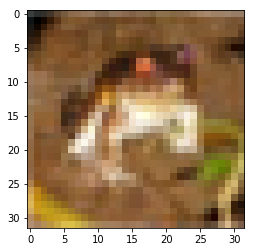

In [14]:
plt.imshow(x_train[0])

In [0]:
def NNmodel():
  model = Sequential()
  model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
  ## we are using 32 convolutional filter and each is 3x3 size and the input shape is the shape given
  ## we add max pool with 2x2 size

  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))
  ## this is the inittial processing layer

  ## this is the calculation layer
  model.add(Flatten())
  model.add(Dense(512)) ## there will be 512 nurons
  model.add(Activation('relu'))
  model.add(Dropout(.2))
  model.add(Dense(512)) ## there will be 512 nurons
  model.add(Activation('relu'))
  model.add(Dropout(.2))
  model.add(Dense(512)) ## there will be 512 nurons
  model.add(Activation('relu'))
  model.add(Dropout(.2))
  model.add(Dense(10)) ## there will be 10 nurons this will be target
  model.add(Activation('softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  return model



In [20]:
model = NNmodel()

In [21]:
model.fit(x_train_norm,y_train,epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.8568 - acc: 0.3263
Epoch 2/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6733 - acc: 0.4071
Epoch 3/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6130 - acc: 0.4387
Epoch 4/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5834 - acc: 0.4504
Epoch 5/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5739 - acc: 0.4562
Epoch 6/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.5693 - acc: 0.4639
Epoch 7/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.5713 - acc: 0.4648
Epoch 8/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5707 - acc: 0.4689
Epoch 9/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.5757 - 

In [22]:
score = model.evaluate(x_test_norm,y_test)

10000/10000 [==============================] - 1s 83us/step


In [23]:
print (score)

[3.928401826477051, 0.257]


In [0]:
# its very poor score make another Deeper model